<a href="https://colab.research.google.com/github/ellerybledsoe/Springboard/blob/main/Austin_Restaurant_Inspections_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#from google.colab import files

In [3]:
%ls

austin_restaurant_inspections_full_dataset_03.csv
austin_restaurant_inspections_X_test.csv
austin_restaurant_inspections_X_train.csv
austin_restaurant_inspections_y_test.csv
austin_restaurant_inspections_y_train.csv
sample_data/


In [4]:
# %pwd

In [5]:
#%cd ..

In [41]:
full = pd.read_csv("/content/austin_restaurant_inspections_full_dataset_03.csv")
X_train_scaled = pd.read_csv('/content/austin_restaurant_inspections_X_train.csv')
X_test_scaled = pd.read_csv('/content/austin_restaurant_inspections_X_test.csv')
y_train = pd.read_csv('/content/austin_restaurant_inspections_y_train.csv')
y_test = pd.read_csv('/content/austin_restaurant_inspections_y_test.csv')

In [42]:
X_train_scaled.head()

,Unnamed: 0,review_length,review_word_count,oldest_score,newest_score,reviews_count,stars,useful_sum,stars_5.0_sum,cool_sum,RestaurantsPriceRange2,funny_sum,Restaurants,BusinessAcceptsCreditCards,Smoking_0,RestaurantsTakeOut,is_open,stars_4.0_sum,RestaurantsGoodForGroups,GoodForKids,BikeParking,lot,HasTV,RestaurantsDelivery,casual,NoiseLevel_u'average',stars_1.0_sum,OutdoorSeating,lunch,Caters,Food,stars_3.0_sum,RestaurantsAttire_'casual',RestaurantsAttire_u'casual',dinner,WiFi_u'free',WheelchairAccessible,stars_2.0_sum,HappyHour,classy,Alcohol_u'none',RestaurantsTableService,street,RestaurantsReservations,Bars,WiFi_u'no',Alcohol_u'full_bar',Mexican,Nightlife,NoiseLevel_0,DogsAllowed,Breakfast & Brunch,RestaurantsPriceRange_0.0,RestaurantsPriceRange_1.0,RestaurantsPriceRange_2.0,RestaurantsPriceRange_3.0,Score_LG
0,4153,0.042165,0.043746,0.800000,0.277778,0.010256,0.375,0.004975,0.000000,0.000000,0.5,0.000,1.0,1.0,1,1.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0.030303,0.0,1.0,0.0,1.0,0.055556,1,0,0.0,0,0.0,0.000000,0.0,0.0,1,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,1.0,0,0,1,0,0.933333
1,2528,0.188831,0.180803,0.533333,0.611111,0.087179,0.750,0.039801,0.046053,0.037838,0.5,0.040,1.0,1.0,1,1.0,1.0,0.178571,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1,0.090909,0.0,0.0,0.0,0.0,0.111111,1,0,0.0,1,0.0,0.000000,0.0,1.0,0,1.0,1.0,0.0,0.0,0,1,0.0,0.0,0,1.0,1.0,0,0,1,0,0.644444
2,5064,0.000000,0.000000,0.866667,0.805556,0.000000,0.500,0.000000,0.000000,0.000000,0.5,0.000,1.0,1.0,0,0.0,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0.000000,0.0,0.0,0.0,0.0,0.000000,0,0,0.0,1,1.0,0.000000,1.0,0.0,0,0.0,1.0,0.0,1.0,0,1,0.0,1.0,0,1.0,0.0,0,0,1,0,0.844444
3,4135,0.018644,0.016990,1.000000,0.722222,0.005128,0.750,0.000000,0.006579,0.000000,0.0,0.000,1.0,1.0,1,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1.0,0.000000,0,0,0.0,0,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,1,0,0,0,1.000000
4,723,0.279299,0.275184,0.822222,0.750000,0.179487,0.750,0.054726,0.118421,0.027027,0.5,0.024,1.0,1.0,1,1.0,1.0,0.250000,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0.121212,1.0,0.0,0.0,0.0,0.222222,0,1,1.0,0,0.0,0.083333,1.0,0.0,0,1.0,1.0,1.0,0.0,1,0,0.0,0.0,0,0.0,0.0,0,0,1,0,0.822222


In [43]:
y_train.pass_fail_flag.value_counts(normalize=True)

0    0.991414
1    0.008586
Name: pass_fail_flag, dtype: float64

In [44]:
full.letter_grade.value_counts(normalize=True)

A    0.582074
B    0.315762
C    0.093922
F    0.008242
Name: letter_grade, dtype: float64

In [45]:
y_train.drop(columns=['Unnamed: 0'], inplace = True)
X_train_scaled.drop(columns=['Unnamed: 0','Score_LG','oldest_score','newest_score','is_open','RestaurantsPriceRange_0.0','Food'], inplace = True)
y_test.drop(columns=['Unnamed: 0'], inplace = True)
X_test_scaled.drop(columns=['Unnamed: 0','Score_LG','oldest_score','newest_score','is_open','RestaurantsPriceRange_0.0','Food'], inplace = True)

In [46]:
print(X_train_scaled.shape)
print(y_train.shape)
print(y_test.shape)

train_scaled = pd.concat([y_train,X_train_scaled], axis=1)
test_scaled = pd.concat([y_test,X_test_scaled], axis=1)

print(train_scaled.shape)
print(test_scaled.shape)

(4659, 50)
(4659, 1)
(1165, 1)
(4659, 51)
(1165, 51)


In [47]:
print(train_scaled.columns)

Index(['pass_fail_flag', 'review_length', 'review_word_count', 'reviews_count',
       'stars', 'useful_sum', 'stars_5.0_sum', 'cool_sum',
       'RestaurantsPriceRange2', 'funny_sum', 'Restaurants',
       'BusinessAcceptsCreditCards', 'Smoking_0', 'RestaurantsTakeOut',
       'stars_4.0_sum', 'RestaurantsGoodForGroups', 'GoodForKids',
       'BikeParking', 'lot', 'HasTV', 'RestaurantsDelivery', 'casual',
       'NoiseLevel_u'average'', 'stars_1.0_sum', 'OutdoorSeating', 'lunch',
       'Caters', 'stars_3.0_sum', 'RestaurantsAttire_'casual'',
       'RestaurantsAttire_u'casual'', 'dinner', 'WiFi_u'free'',
       'WheelchairAccessible', 'stars_2.0_sum', 'HappyHour', 'classy',
       'Alcohol_u'none'', 'RestaurantsTableService', 'street',
       'RestaurantsReservations', 'Bars', 'WiFi_u'no'', 'Alcohol_u'full_bar'',
       'Mexican', 'Nightlife', 'NoiseLevel_0', 'DogsAllowed',
       'Breakfast & Brunch', 'RestaurantsPriceRange_1.0',
       'RestaurantsPriceRange_2.0', 'RestaurantsPrice

In [48]:
train_scaled.pass_fail_flag.value_counts(normalize=True)

0    0.991414
1    0.008586
Name: pass_fail_flag, dtype: float64

In [49]:
train_scaled.head(1)

,pass_fail_flag,review_length,review_word_count,reviews_count,stars,useful_sum,stars_5.0_sum,cool_sum,RestaurantsPriceRange2,funny_sum,Restaurants,BusinessAcceptsCreditCards,Smoking_0,RestaurantsTakeOut,stars_4.0_sum,RestaurantsGoodForGroups,GoodForKids,BikeParking,lot,HasTV,RestaurantsDelivery,casual,NoiseLevel_u'average',stars_1.0_sum,OutdoorSeating,lunch,Caters,stars_3.0_sum,RestaurantsAttire_'casual',RestaurantsAttire_u'casual',dinner,WiFi_u'free',WheelchairAccessible,stars_2.0_sum,HappyHour,classy,Alcohol_u'none',RestaurantsTableService,street,RestaurantsReservations,Bars,WiFi_u'no',Alcohol_u'full_bar',Mexican,Nightlife,NoiseLevel_0,DogsAllowed,Breakfast & Brunch,RestaurantsPriceRange_1.0,RestaurantsPriceRange_2.0,RestaurantsPriceRange_3.0
0,0,0.042165,0.043746,0.010256,0.375,0.004975,0.0,0.0,0.5,0.0,1.0,1.0,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0.030303,0.0,1.0,0.0,0.055556,1,0,0.0,0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,1.0,0,1,0


In [50]:
pass_train_data = train_scaled[train_scaled.pass_fail_flag == 0].iloc[:,1:]
fail_train_data = train_scaled[train_scaled.pass_fail_flag == 1].iloc[:,1:]

In [51]:
fail_train_data.head()

,review_length,review_word_count,reviews_count,stars,useful_sum,stars_5.0_sum,cool_sum,RestaurantsPriceRange2,funny_sum,Restaurants,BusinessAcceptsCreditCards,Smoking_0,RestaurantsTakeOut,stars_4.0_sum,RestaurantsGoodForGroups,GoodForKids,BikeParking,lot,HasTV,RestaurantsDelivery,casual,NoiseLevel_u'average',stars_1.0_sum,OutdoorSeating,lunch,Caters,stars_3.0_sum,RestaurantsAttire_'casual',RestaurantsAttire_u'casual',dinner,WiFi_u'free',WheelchairAccessible,stars_2.0_sum,HappyHour,classy,Alcohol_u'none',RestaurantsTableService,street,RestaurantsReservations,Bars,WiFi_u'no',Alcohol_u'full_bar',Mexican,Nightlife,NoiseLevel_0,DogsAllowed,Breakfast & Brunch,RestaurantsPriceRange_1.0,RestaurantsPriceRange_2.0,RestaurantsPriceRange_3.0
9,0.039815,0.039331,0.046154,0.625,0.024876,0.019737,0.0,0.50,0.000,1.0,1.0,1,1.0,0.035714,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0.121212,0.0,1.0,1.0,0.055556,0,1,1.0,1,0.0,0.000000,0.0,0.0,1,0.0,0.0,1.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,1,0
164,0.018076,0.017993,0.015385,0.625,0.014925,0.006579,0.0,0.25,0.008,1.0,1.0,1,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,0.030303,1.0,1.0,1.0,0.000000,1,0,0.0,1,0.0,0.041667,1.0,0.0,0,0.0,1.0,1.0,1.0,0,1,1.0,1.0,0,0.0,0.0,1,0,0
296,0.010560,0.010702,0.010256,0.250,0.004975,0.000000,0.0,0.25,0.016,1.0,1.0,1,1.0,0.000000,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0,0.030303,0.0,0.0,0.0,0.000000,0,1,0.0,0,0.0,0.041667,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,1,0,0
408,0.000000,0.000000,0.000000,0.500,0.000000,0.000000,0.0,0.50,0.000,1.0,1.0,1,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0.000000,1.0,1.0,0.0,0.000000,1,0,1.0,0,1.0,0.000000,1.0,0.0,0,0.0,0.0,1.0,1.0,1,0,0.0,0.0,0,0.0,0.0,0,1,0
482,0.000000,0.000000,0.000000,0.625,0.000000,0.000000,0.0,0.50,0.000,1.0,1.0,1,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0.000000,0.0,1.0,1.0,0.000000,0,1,1.0,1,0.0,0.000000,1.0,1.0,0,0.0,1.0,0.0,1.0,0,0,0.0,1.0,0,0.0,0.0,0,1,0


In [52]:
pass_test_data = test_scaled[test_scaled.pass_fail_flag == 0].iloc[:,1:].reset_index(drop=True)
fail_test_data = test_scaled[test_scaled.pass_fail_flag == 1].iloc[:,1:].reset_index(drop=True)

In [53]:
pass_train_data.shape

(4619, 50)

In [54]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(25, activation='relu'))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(25, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='sigmoid'))

#https://www.youtube.com/watch?v=S31E-ftRfQI&list=PLbxRL2wtmn7rENj4iA3FC5VE4LNvIweqs&index=2

In [112]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(25,activation='relu'),
      tf.keras.layers.Dense(12,activation='relu'),
      tf.keras.layers.Dense(6,activation='relu')])
    
    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(12,activation='relu'),
      tf.keras.layers.Dense(25,activation='relu'),
      tf.keras.layers.Dense(50,activation='sigmoid')])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

# https://www.youtube.com/watch?v=S31E-ftRfQI&list=PLbxRL2wtmn7rENj4iA3FC5VE4LNvIweqs&index=2

In [115]:
model = AutoEncoder()
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')

model.compile(optimizer='adam', loss='mean_squared_error')

#https://www.datacamp.com/community/tutorials/autoencoder-keras-tutorial

In [116]:
ae = model.fit(pass_train_data, pass_train_data,
               epochs = 20,
               batch_size = 100,
               validation_data = (train_scaled.iloc[:,1:], train_scaled.iloc[:,1:]),
               shuffle = True,
               callbacks = [early_stop])

Epoch 1/20
47/47 [==============================] - 1s 10ms/step - loss: 0.2128 - val_loss: 0.1740
Epoch 2/20
47/47 [==============================] - 0s 4ms/step - loss: 0.1509 - val_loss: 0.1377
Epoch 3/20
47/47 [==============================] - 0s 4ms/step - loss: 0.1355 - val_loss: 0.1334
Epoch 4/20
47/47 [==============================] - 0s 4ms/step - loss: 0.1310 - val_loss: 0.1269
Epoch 5/20
47/47 [==============================] - 0s 4ms/step - loss: 0.1213 - val_loss: 0.1152
Epoch 6/20
47/47 [==============================] - 0s 4ms/step - loss: 0.1099 - val_loss: 0.1032
Epoch 7/20
47/47 [==============================] - 0s 5ms/step - loss: 0.0984 - val_loss: 0.0949
Epoch 8/20
47/47 [==============================] - 0s 5ms/step - loss: 0.0935 - val_loss: 0.0920
Epoch 9/20
47/47 [==============================] - 0s 5ms/step - loss: 0.0910 - val_loss: 0.0895
Epoch 10/20
47/47 [==============================] - 0s 4ms/step - loss: 0.0886 - val_loss: 0.0873
Epoch 11/20
47/47 

In [96]:
pass_test_data.head()

,review_length,review_word_count,reviews_count,stars,useful_sum,stars_5.0_sum,cool_sum,RestaurantsPriceRange2,funny_sum,Restaurants,BusinessAcceptsCreditCards,Smoking_0,RestaurantsTakeOut,stars_4.0_sum,RestaurantsGoodForGroups,GoodForKids,BikeParking,lot,HasTV,RestaurantsDelivery,casual,NoiseLevel_u'average',stars_1.0_sum,OutdoorSeating,lunch,Caters,stars_3.0_sum,RestaurantsAttire_'casual',RestaurantsAttire_u'casual',dinner,WiFi_u'free',WheelchairAccessible,stars_2.0_sum,HappyHour,classy,Alcohol_u'none',RestaurantsTableService,street,RestaurantsReservations,Bars,WiFi_u'no',Alcohol_u'full_bar',Mexican,Nightlife,NoiseLevel_0,DogsAllowed,Breakfast & Brunch,RestaurantsPriceRange_1.0,RestaurantsPriceRange_2.0,RestaurantsPriceRange_3.0
0,0.021689,0.020042,0.008065,0.571429,0.000000,0.005348,0.000000,0.25,0.000000,1.0,1.0,1,1.0,0.022222,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1,0.000000,1.0,1.0,0.0,0.0,1,0,0.0,0,0.0,0.0,0.0,0.0,1,1.0,1.0,0.0,1.0,0,0,0.0,1.0,0,0.0,1.0,1,0,0
1,0.030766,0.029896,0.008065,0.428571,0.000000,0.000000,0.000000,0.25,0.000000,1.0,1.0,1,1.0,0.022222,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0.035714,0.0,0.0,1.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1,0.0,0.0,1,0,0
2,0.044780,0.041587,0.020161,0.714286,0.033898,0.021390,0.029557,0.50,0.034247,1.0,1.0,1,1.0,0.022222,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1,0.000000,1.0,1.0,1.0,0.0,0,1,1.0,0,0.0,0.0,0.0,0.0,0,1.0,0.0,1.0,0.0,0,1,0.0,0.0,0,1.0,0.0,0,1,0
3,0.008249,0.007516,0.004032,0.571429,0.000000,0.005348,0.000000,0.25,0.000000,1.0,1.0,1,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1,0.000000,1.0,1.0,1.0,0.0,1,0,0.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0,1.0,0.0,0,0.0,0.0,1,0,0
4,0.000000,0.000000,0.000000,0.428571,0.000000,0.000000,0.000000,0.25,0.000000,1.0,1.0,1,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0,0.000000,0.0,0.0,0.0,0.0,1,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,1,0,0


In [98]:
pass_test_data.dtypes

review_length                  float64
review_word_count              float64
reviews_count                  float64
stars                          float64
useful_sum                     float64
stars_5.0_sum                  float64
cool_sum                       float64
RestaurantsPriceRange2         float64
funny_sum                      float64
Restaurants                    float64
BusinessAcceptsCreditCards     float64
Smoking_0                        int64
RestaurantsTakeOut             float64
stars_4.0_sum                  float64
RestaurantsGoodForGroups       float64
GoodForKids                    float64
BikeParking                    float64
lot                            float64
HasTV                          float64
RestaurantsDelivery            float64
casual                         float64
NoiseLevel_u'average'            int64
stars_1.0_sum                  float64
OutdoorSeating                 float64
lunch                          float64
Caters                   

In [122]:
#pass_test_data[pass_test_data.isna().any(axis=1)]
#pass_train_data.to_numpy()

In [121]:
encoder_out = model.encoder(pass_train_data.to_numpy())
decoder_out = model.decoder(encoder_out)

In [125]:
print(encoder_out.shape)
print(decoder_out.shape)

(4619, 6)
(4619, 50)


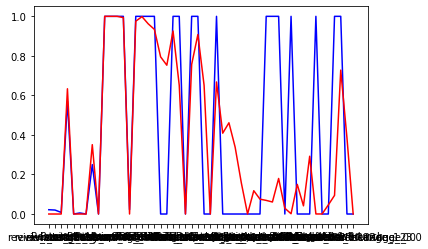

In [127]:
plt.plot(pass_test_data.iloc[0],'b')
plt.plot(decoder_out[0],'r')

In [128]:
encoder_out = model.encoder(fail_train_data.to_numpy())
decoder_out = model.decoder(encoder_out)

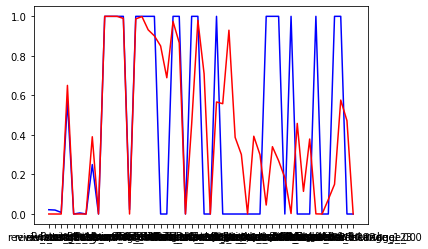

In [129]:
plt.plot(pass_test_data.iloc[0],'b')
plt.plot(decoder_out[0],'r')

(array([  7.,  18.,  42.,  59.,  85.,  95.,  89., 114., 114.,  72., 103.,
         66.,  63.,  50.,  63.,  37.,  30.,  23.,  12.,   3.,   2.,   2.,
          3.,   1.,   1.,   1.,   0.,   0.,   1.,   1.]),
 array([0.01537742, 0.02229994, 0.02922245, 0.03614497, 0.04306748,
        0.04998999, 0.05691251, 0.06383502, 0.07075753, 0.07768005,
        0.08460256, 0.09152508, 0.09844759, 0.1053701 , 0.11229262,
        0.11921513, 0.12613765, 0.13306016, 0.13998267, 0.14690519,
        0.1538277 , 0.16075022, 0.16767273, 0.17459524, 0.18151776,
        0.18844027, 0.19536278, 0.2022853 , 0.20920781, 0.21613033,
        0.22305284]),
 <a list of 30 Patch objects>)

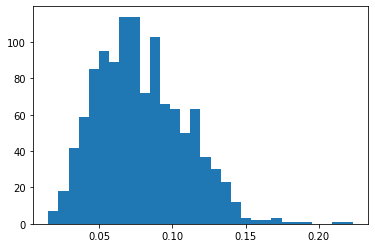

In [138]:
reconstruct = model.predict(pass_test_data)
train_loss = tf.keras.losses.mean_squared_error(reconstruct, pass_test_data)

plt.hist(train_loss, bins=30)

In [133]:
print(np.mean(train_loss))
print(np.std(train_loss))


0.0786610477274083
0.03044442913515418


In [136]:
_2sigma_boundary = np.mean(train_loss) + 2*np.std(train_loss)
_2sigma_boundary

0.13954990599771666

(array([1., 0., 0., 0., 2., 0., 0., 1., 0., 2., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.05724661, 0.06127985, 0.06531309, 0.06934634, 0.07337958,
        0.07741282, 0.08144607, 0.08547931, 0.08951255, 0.0935458 ,
        0.09757904, 0.10161229, 0.10564553, 0.10967877, 0.11371202,
        0.11774526, 0.1217785 , 0.12581175, 0.12984499, 0.13387823,
        0.13791148, 0.14194472, 0.14597796, 0.15001121, 0.15404445,
        0.1580777 , 0.16211094, 0.16614418, 0.17017743, 0.17421067,
        0.17824391]),
 <a list of 30 Patch objects>)

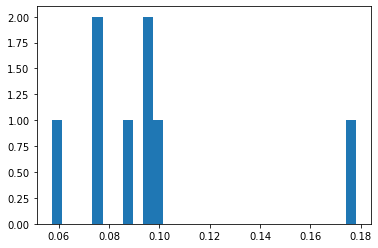

In [141]:
reconstruct_f = model.predict(fail_test_data)
train_loss_f = tf.keras.losses.mean_squared_error(reconstruct_f, fail_test_data)

plt.hist(train_loss_fail, bins = 30)

In [142]:
print(np.mean(train_loss_f))
print(np.std(train_loss_f))

0.09642090942387382
0.0337282086651517


In [143]:
_2sigma_boundary_f = np.mean(train_loss_f) + 2*np.std(train_loss_f)
_2sigma_boundary_f

0.1638773267541772